#  <b>╭</b> <u>eSports Earnings - Data Analysis</u> <b>╮</b>

## ¤ Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### ⭒ Format options

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
plt.style.use('seaborn')

In [4]:
#plt.style.available

In [5]:
# bold/underline text format
format_underline = '\033[4m'
format_bold = '\033[1m'
format_end = '\033[0m'

# 

## ¤ Load the Data

In [6]:
# Dataset: https://www.kaggle.com/jackdaoud/esports-earnings-for-players-teams-by-game

In [7]:
path = '../Datasets/eSports/'

In [8]:
countries = pd.read_csv(path + 'country-and-continent-codes-list.csv')
players = pd.read_csv(path + 'highest_earning_players.csv')
teams = pd.read_csv(path + 'highest_earning_teams.csv')

# 

## ¤ Data Exploratory

#### ⭒ Exploring Countries DataFrame

In [9]:
countries.head()

Continent_Name Continent_Code                                  Country_Name  \
0           Asia             AS              Afghanistan, Islamic Republic of   
1         Europe             EU                          Albania, Republic of   
2     Antarctica             AN  Antarctica (the territory South of 60 deg S)   
3         Africa             AF      Algeria, People's Democratic Republic of   
4        Oceania             OC                                American Samoa   

  Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
0                      AF                       AFG            4.00  
1                      AL                       ALB            8.00  
2                      AQ                       ATA           10.00  
3                      DZ                       DZA           12.00  
4                      AS                       ASM           16.00

In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB


# 

In [11]:
countries.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [12]:
print('Missing Values (in percentage, in country data)', end='\n\n')
for col in countries.columns:
    miss_val = countries[col].isnull().sum() / countries.isnull().sum().sum()
    if len(str(miss_val * 100).split('.')[0]) == 1:
        print(f'[  {round(miss_val * 100, 1)}% ] ', col)
    else:
        print(f'[ {round(miss_val * 100, 1)}% ] ', col)

Missing Values (in percentage, in country data)

[  0.0% ]  Continent_Name
[ 82.7% ]  Continent_Code
[  0.0% ]  Country_Name
[  1.9% ]  Two_Letter_Country_Code
[  7.7% ]  Three_Letter_Country_Code
[  7.7% ]  Country_Number


In [13]:
country_non_null_values = ~countries.isnull()
country_non_null_values = country_non_null_values.sum().sum()

country_total_null_values = round(countries.isnull().sum().sum() / country_non_null_values * 100, 2)

print('\n➥  We have {1}{0}%{2} of missing values in {1}Countries{2} dataframe.'.format(country_total_null_values, format_bold, format_end), end='\n\n')


➥  We have 3.42% of missing values in Countries dataframe.



# 

In [14]:
countries.duplicated().sum()

0

In [15]:
duplicates_in_country = countries.duplicated().sum()

print('\n➥  We have {1}{0}{2} duplicated row(s) in {1}Countries{2} dataframe.'.format(duplicates_in_country, format_bold, format_end), end='\n\n')


➥  We have 0 duplicated row(s) in Countries dataframe.



# 

In [16]:
countries.sample(5)

Continent_Name Continent_Code                   Country_Name  \
36            Asia             AS           Cambodia, Kingdom of   
1           Europe             EU           Albania, Republic of   
101         Europe             EU  Holy See (Vatican City State)   
247         Africa             AF   Tanzania, United Republic of   
137           Asia             AS          Maldives, Republic of   

    Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
36                       KH                       KHM          116.00  
1                        AL                       ALB            8.00  
101                      VA                       VAT          336.00  
247                      TZ                       TZA          834.00  
137                      MV                       MDV          462.00

In [17]:
index_cols = range(len(countries.columns))
index_cols = list(index_cols)
index_cols.remove(1)

# to see what nan values are here, except for the continent_code column
countries[countries.iloc[:, index_cols].isnull().any(axis=1)]

Continent_Name Continent_Code                    Country_Name  \
152         Africa             AF            Namibia, Republic of   
258        Oceania             OC              Disputed Territory   
259           Asia             AS  Iraq-Saudi Arabia Neutral Zone   
260           Asia             AS     United Nations Neutral Zone   
261           Asia             AS                 Spratly Islands   

    Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
152                     NaN                       NAM          516.00  
258                      XX                       NaN             NaN  
259                      XE                       NaN             NaN  
260                      XD                       NaN             NaN  
261                      XS                       NaN             NaN

# 

#### ⭒ Exploring Players DataFrame

In [18]:
players.head()

PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          dk   1,822,989.41   
1      3679   Andreas   Højsleth         Xyp9x          dk   1,799,288.57   
2      3885   Nicolai     Reedtz        dev1ce          dk   1,787,489.88   
3      3672     Lukas  Rossander        gla1ve          dk   1,652,350.75   
4     17800      Emil       Reif        Magisk          dk   1,416,448.64   

                               Game                 Genre  
0  Counter-Strike: Global Offensive  First-Person Shooter  
1  Counter-Strike: Global Offensive  First-Person Shooter  
2  Counter-Strike: Global Offensive  First-Person Shooter  
3  Counter-Strike: Global Offensive  First-Person Shooter  
4  Counter-Strike: Global Offensive  First-Person Shooter

In [19]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


# 

In [20]:
players.isnull().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [21]:
players.duplicated().sum()

0

In [22]:
players_non_null_values = players.notnull().sum().sum()
players_total_null_values = round(players.isnull().sum().sum() / players_non_null_values * 100, 2)

duplicates_in_players = players.duplicated().sum()


# just a nice format if we don't have missing values, such as 0% instead of 0.0%
def proper_format(checking_float):
    if checking_float == 0.0:
        return int(checking_float)
    else:
        return checking_float
        

print('\n➥  We have {2}{0}%{3} of missing values and {2}{1}{3} duplicated row(s) in {2}Players{3} dataframe.'.format(proper_format(players_total_null_values),
                                                                                                                      duplicates_in_players,
                                                                                                                      format_bold,
                                                                                                                      format_end), end='\n\n')


➥  We have 0% of missing values and 0 duplicated row(s) in Players dataframe.



# 

#### ⭒ Exploring Teams DataFrame

In [23]:
teams.head()

TeamId             TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760  San Francisco Shock   3,105,000.00                 7  Overwatch   
1     776      London Spitfire   1,591,136.50                13  Overwatch   
2     768   New York Excelsior   1,572,618.50                18  Overwatch   
3     773  Philadelphia Fusion   1,186,278.50                15  Overwatch   
4     766        Seoul Dynasty   1,130,000.00                 6  Overwatch   

                  Genre  
0  First-Person Shooter  
1  First-Person Shooter  
2  First-Person Shooter  
3  First-Person Shooter  
4  First-Person Shooter

In [24]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [25]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


# 

In [26]:
teams.isnull().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [27]:
teams.duplicated().sum()

0

In [28]:
teams_non_null_values = teams.notnull().sum().sum()
teams_total_null_values = round(teams.isnull().sum().sum() / teams_non_null_values * 100, 2)

duplicates_in_teams = teams.duplicated().sum()
      

print('\n➥  We have {2}{0}%{3} of missing values and {2}{1}{3} duplicated row(s) in {2}Teams{3} dataframe.'.format(proper_format(teams_total_null_values),
                                                                                                                    duplicates_in_teams,
                                                                                                                    format_bold,
                                                                                                                    format_end), end='\n\n')


➥  We have 0% of missing values and 0 duplicated row(s) in Teams dataframe.



# 

## ¤ Data Transformation

In [29]:
players.head()

PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          dk   1,822,989.41   
1      3679   Andreas   Højsleth         Xyp9x          dk   1,799,288.57   
2      3885   Nicolai     Reedtz        dev1ce          dk   1,787,489.88   
3      3672     Lukas  Rossander        gla1ve          dk   1,652,350.75   
4     17800      Emil       Reif        Magisk          dk   1,416,448.64   

                               Game                 Genre  
0  Counter-Strike: Global Offensive  First-Person Shooter  
1  Counter-Strike: Global Offensive  First-Person Shooter  
2  Counter-Strike: Global Offensive  First-Person Shooter  
3  Counter-Strike: Global Offensive  First-Person Shooter  
4  Counter-Strike: Global Offensive  First-Person Shooter

In [30]:
players['CountryCode'].str.upper()

0      DK
1      DK
2      DK
3      DK
4      DK
       ..
995    FI
996    US
997    IT
998    US
999    SE
Name: CountryCode, Length: 1000, dtype: object

In [31]:
players['CountryCode'] = players['CountryCode'].str.upper()

# 

In [32]:
countries.head()

Continent_Name Continent_Code                                  Country_Name  \
0           Asia             AS              Afghanistan, Islamic Republic of   
1         Europe             EU                          Albania, Republic of   
2     Antarctica             AN  Antarctica (the territory South of 60 deg S)   
3         Africa             AF      Algeria, People's Democratic Republic of   
4        Oceania             OC                                American Samoa   

  Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
0                      AF                       AFG            4.00  
1                      AL                       ALB            8.00  
2                      AQ                       ATA           10.00  
3                      DZ                       DZA           12.00  
4                      AS                       ASM           16.00

In [33]:
# if we don't use this filter, we'll get an error about NaN values
filtered = countries['Two_Letter_Country_Code'].notnull()

countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

0      AF
1      AL
2      AQ
3      DZ
4      AS
       ..
257    ZM
258    XX
259    XE
260    XD
261    XS
Name: Two_Letter_Country_Code, Length: 261, dtype: object

In [34]:
countries['Two_Letter_Country_Code'] = countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

# 

In [35]:
players_location = pd.merge(countries, players, left_on='Two_Letter_Country_Code', right_on='CountryCode')

In [36]:
players_location = players_location.loc[:, ['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'TotalUSDPrize', 'Game', 'Genre',
                                            'Continent_Name', 'Country_Name', 'Country_Number']]

In [37]:
players_location.head()

PlayerId  NameFirst   NameLast CurrentHandle  TotalUSDPrize         Game  \
0     61896     Thiago       Lapp          kinG   1,021,000.00     Fortnite   
1     30167  Francisco  Leimontas           PNC      82,409.24  Hearthstone   
2     15703       Facu     Pruzzo     Nalguidan      70,750.00  Hearthstone   
3     30451    Anathan       Pham           ana   6,000,411.96       Dota 2   
4     15530     Damien       Chok          kpii   1,809,225.30       Dota 2   

                             Genre Continent_Name  \
0                    Battle Royale  South America   
1            Collectible Card Game  South America   
2            Collectible Card Game  South America   
3  Multiplayer Online Battle Arena        Oceania   
4  Multiplayer Online Battle Arena        Oceania   

                    Country_Name  Country_Number  
0  Argentina, Argentine Republic           32.00  
1  Argentina, Argentine Republic           32.00  
2  Argentina, Argentine Republic           32.00  
3     Australia, Commonwealth of           36.00  
4     Australia, Commonwealth of           36.00

In [38]:
print('\n ➥ Now... we can use analysis based on the player\'s location.')


 ➥ Now... we can use analysis based on the player's location.


# 

## ¤ Data Visualization

### ⭒ Top Genre of Games by Earnings

In [39]:
top_games = players.groupby('Game')['TotalUSDPrize'].sum().sort_values(ascending=False)

In [40]:
top_games

Game
Dota 2                             179,178,818.95
Counter-Strike: Global Offensive    56,541,920.90
Fortnite                            43,409,370.91
League of Legends                   35,043,475.87
Starcraft II                        25,379,823.93
Hearthstone                         13,335,640.79
PUBG                                12,441,958.89
Overwatch                           12,347,808.50
Heroes of the Storm                 11,780,445.24
Arena of Valor                       8,333,952.43
Name: TotalUSDPrize, dtype: float64

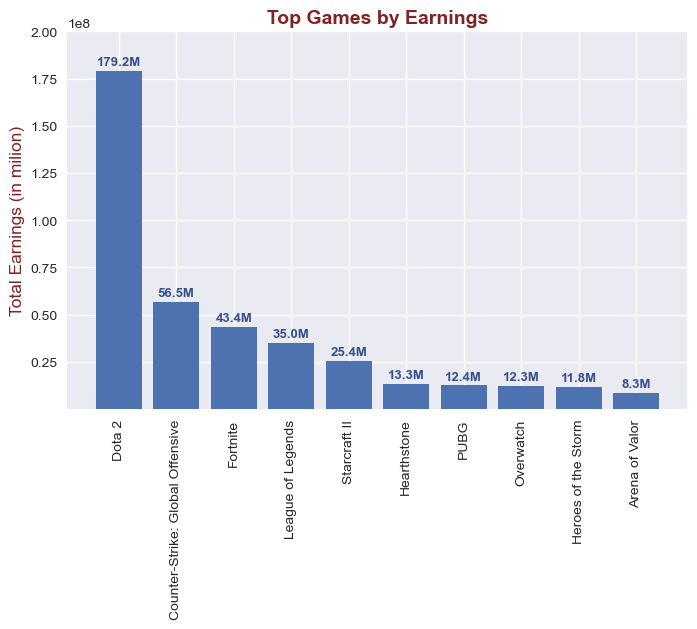

In [41]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

plt.bar(top_games.index, top_games)


y_position = 3 * (10 ** 6)
for idx, val in enumerate(top_games):
    ax.text(idx, val + y_position, str(round(val / 10 ** 6, 1)) + 'M', ha='center', color='#36518B', fontweight='bold', fontsize=9.5)


plt.title('Top Games by Earnings', fontsize=14, color='#802323', fontweight='bold')
plt.ylabel('Total Earnings (in milion)', fontsize=12.5, color='#802323')

x = 10 ** 8    # 100,000,000
plt.yticks([0.25*x, 0.5*x, 0.75*x, 1*x, 1.25*x, 1.5*x, 1.75*x, 2*x])
plt.xticks(rotation=90)

#plt.grid(axis='y')
plt.show()
#fig.savefig('Top Games by Earnings.png')

In [42]:
top1_game = top_games.index[0]
top1_earnings = top_games[0]

print('\n ➥ As we can see in this graph,  {0}{2}{1}  has huge Earnings ({0}${3:,}{1}) compared with other games!'.format(format_bold,
                                                                                                                               format_end,
                                                                                                                               top1_game,
                                                                                                                               top1_earnings))


 ➥ As we can see in this graph,  Dota 2  has huge Earnings ($179,178,818.95) compared with other games!


# 

### ⭒ Top 10 Players (by Earnings)

In [43]:
players.head()

PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          DK   1,822,989.41   
1      3679   Andreas   Højsleth         Xyp9x          DK   1,799,288.57   
2      3885   Nicolai     Reedtz        dev1ce          DK   1,787,489.88   
3      3672     Lukas  Rossander        gla1ve          DK   1,652,350.75   
4     17800      Emil       Reif        Magisk          DK   1,416,448.64   

                               Game                 Genre  
0  Counter-Strike: Global Offensive  First-Person Shooter  
1  Counter-Strike: Global Offensive  First-Person Shooter  
2  Counter-Strike: Global Offensive  First-Person Shooter  
3  Counter-Strike: Global Offensive  First-Person Shooter  
4  Counter-Strike: Global Offensive  First-Person Shooter

In [44]:
top_10_players = players.sort_values('TotalUSDPrize', ascending=False).head(10)

In [45]:
top_10_players = top_10_players.sort_values('TotalUSDPrize')

In [46]:
top_10_players

PlayerId  NameFirst      NameLast CurrentHandle CountryCode  \
109     12133      Lasse    Urpalainen    Matumbaman          FI   
108     25335     Maroun        Merhej            GH          LB   
107     12579       Ivan        Ivanov  MinD_ContRoL          BG   
106     14671       Amer    Al-Barkawi      Miracle-          JO   
105      3145       Kuro     Takhasomi        KuroKy          DE   
104     18897     Topias  Taavitsainen        Topson          FI   
103      2811  Sébastien          Debs           Ceb          FR   
102     30451    Anathan          Pham           ana          AU   
101      3822      Jesse      Vainikka         JerAx          FI   
100      3304      Johan     Sundstein        N0tail          DK   

     TotalUSDPrize    Game                            Genre  
109   3,765,369.04  Dota 2  Multiplayer Online Battle Arena  
108   4,193,412.69  Dota 2  Multiplayer Online Battle Arena  
107   4,579,118.16  Dota 2  Multiplayer Online Battle Arena  
106   4,798,043.68  Dota 2  Multiplayer Online Battle Arena  
105   5,193,382.81  Dota 2  Multiplayer Online Battle Arena  
104   5,470,902.57  Dota 2  Multiplayer Online Battle Arena  
103   5,554,297.41  Dota 2  Multiplayer Online Battle Arena  
102   6,000,411.96  Dota 2  Multiplayer Online Battle Arena  
101   6,470,000.02  Dota 2  Multiplayer Online Battle Arena  
100   6,952,596.58  Dota 2  Multiplayer Online Battle Arena

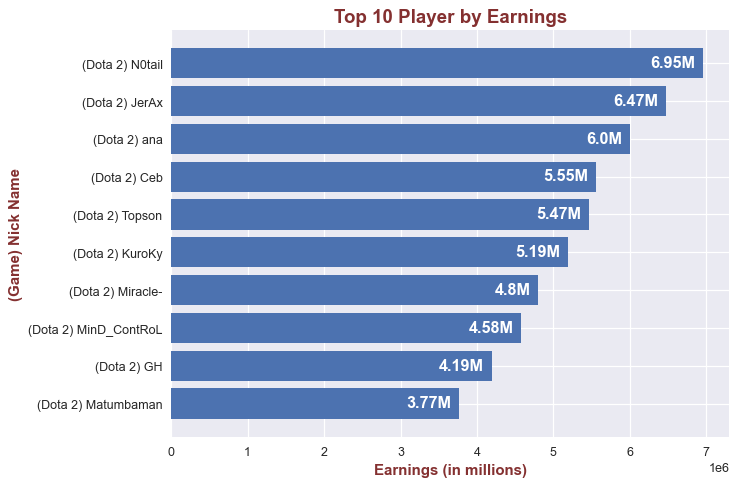

In [47]:
fig, ax = plt.subplots(figsize=(8,6), dpi=90)

plt.barh( '(' + top_10_players['Game'] + ') ' + top_10_players['CurrentHandle'], top_10_players['TotalUSDPrize'])


for idx, val in enumerate(top_10_players['TotalUSDPrize']):
    ax.text(val - 10 ** 5, idx - 0.1, str(round(val / 10 ** 6, 2)) + 'M', ha='right', fontsize=13, color='white',fontweight='bold')


plt.title('Top 10 Player by Earnings', color='#843030', fontsize=15, fontweight='bold')
plt.ylabel('(Game) Nick Name', color='#843030', fontsize=12, fontweight='bold')
plt.xlabel('Earnings (in millions)',  color='#843030', fontsize=12, fontweight='bold')

plt.show()

# 

In [48]:
players_location.head()

PlayerId  NameFirst   NameLast CurrentHandle  TotalUSDPrize         Game  \
0     61896     Thiago       Lapp          kinG   1,021,000.00     Fortnite   
1     30167  Francisco  Leimontas           PNC      82,409.24  Hearthstone   
2     15703       Facu     Pruzzo     Nalguidan      70,750.00  Hearthstone   
3     30451    Anathan       Pham           ana   6,000,411.96       Dota 2   
4     15530     Damien       Chok          kpii   1,809,225.30       Dota 2   

                             Genre Continent_Name  \
0                    Battle Royale  South America   
1            Collectible Card Game  South America   
2            Collectible Card Game  South America   
3  Multiplayer Online Battle Arena        Oceania   
4  Multiplayer Online Battle Arena        Oceania   

                    Country_Name  Country_Number  
0  Argentina, Argentine Republic           32.00  
1  Argentina, Argentine Republic           32.00  
2  Argentina, Argentine Republic           32.00  
3     Australia, Commonwealth of           36.00  
4     Australia, Commonwealth of           36.00

In [49]:
earnings_by_continent = players_location.groupby('Continent_Name')['TotalUSDPrize'].sum()

In [50]:
earnings_by_continent

Continent_Name
Asia            182,713,541.04
Europe          156,351,953.42
North America    57,037,267.41
Oceania           7,999,674.76
South America     6,951,711.24
Name: TotalUSDPrize, dtype: float64

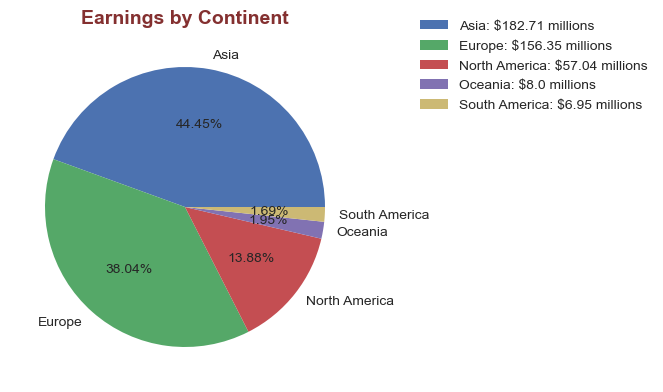

In [51]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
fig.subplots_adjust(0.3, 0, 1, 1)

plt.pie(earnings_by_continent, labels=earnings_by_continent.index, autopct='%.2f%%')

plt.title('Earnings by Continent', color='#843030', fontsize=14, fontweight='bold')


plt.legend(loc='upper right',
           labels=['{}: ${} millions'.format(name, round(val / 10 ** 6, 2)) for name, val in zip(earnings_by_continent.index, earnings_by_continent)],
           bbox_to_anchor=(1.6,1),
           bbox_transform=fig.transFigure)

plt.show()

In [52]:
first_continent = earnings_by_continent.index[0]
first_continent_earnings = earnings_by_continent[0]
second_continent = earnings_by_continent.index[1]
second_continent_earnings = earnings_by_continent[1]
percent_first_c_earn = round(first_continent_earnings / earnings_by_continent.sum() * 100, 2)
percent_second_c_earn = round(second_continent_earnings / earnings_by_continent.sum() * 100, 2)


print('\n ➥ Here are two Continents with huge earnings:\n \
     ⤷ {0}{2}{1} with {0}${3:,}{1}, that represent {0}{4}%{1} from entire earnings of all Continents!\n \
     ⤷ {0}{5}{1} with {0}${6:,}{1}, that represent {0}{7}%{1} from entire earnings of all Continents!'.format(format_bold,
                                                                                                              format_end,
                                                                                                              first_continent,
                                                                                                              first_continent_earnings,
                                                                                                              percent_first_c_earn,
                                                                                                              second_continent,
                                                                                                              second_continent_earnings,
                                                                                                              percent_second_c_earn))


 ➥ Here are two Continents with huge earnings:
      ⤷ Asia with $182,713,541.04, that represent 44.45% from entire earnings of all Continents!
      ⤷ Europe with $156,351,953.42, that represent 38.04% from entire earnings of all Continents!


# 

### ⭒ What is the proportion of earnings per genre in terms of both teams and players?

In [53]:
players_location.head()

PlayerId  NameFirst   NameLast CurrentHandle  TotalUSDPrize         Game  \
0     61896     Thiago       Lapp          kinG   1,021,000.00     Fortnite   
1     30167  Francisco  Leimontas           PNC      82,409.24  Hearthstone   
2     15703       Facu     Pruzzo     Nalguidan      70,750.00  Hearthstone   
3     30451    Anathan       Pham           ana   6,000,411.96       Dota 2   
4     15530     Damien       Chok          kpii   1,809,225.30       Dota 2   

                             Genre Continent_Name  \
0                    Battle Royale  South America   
1            Collectible Card Game  South America   
2            Collectible Card Game  South America   
3  Multiplayer Online Battle Arena        Oceania   
4  Multiplayer Online Battle Arena        Oceania   

                    Country_Name  Country_Number  
0  Argentina, Argentine Republic           32.00  
1  Argentina, Argentine Republic           32.00  
2  Argentina, Argentine Republic           32.00  
3     Australia, Commonwealth of           36.00  
4     Australia, Commonwealth of           36.00

In [54]:
teams.head()

TeamId             TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760  San Francisco Shock   3,105,000.00                 7  Overwatch   
1     776      London Spitfire   1,591,136.50                13  Overwatch   
2     768   New York Excelsior   1,572,618.50                18  Overwatch   
3     773  Philadelphia Fusion   1,186,278.50                15  Overwatch   
4     766        Seoul Dynasty   1,130,000.00                 6  Overwatch   

                  Genre  
0  First-Person Shooter  
1  First-Person Shooter  
2  First-Person Shooter  
3  First-Person Shooter  
4  First-Person Shooter

In [55]:
teams_groupedby_genre = teams.groupby('Genre')['TotalUSDPrize'].sum()

In [56]:
teams_groupedby_genre

Genre
Battle Royale                      51,376,333.09
Collectible Card Game              10,864,526.98
First-Person Shooter              105,319,201.82
Multiplayer Online Battle Arena   305,627,996.77
Strategy                           27,856,145.24
Name: TotalUSDPrize, dtype: float64

In [57]:
players_groupedby_genre = players.groupby('Genre')['TotalUSDPrize'].sum()

In [58]:
players_groupedby_genre

Genre
Battle Royale                      55,851,329.80
Collectible Card Game              13,335,640.79
First-Person Shooter               68,889,729.40
Multiplayer Online Battle Arena   234,336,692.49
Strategy                           25,379,823.93
Name: TotalUSDPrize, dtype: float64

In [59]:
print('Teams Earnings:')
teams_genre = pd.Series(dtype=float)
for idx, value in enumerate(teams_groupedby_genre):
    percent = round(value / teams_groupedby_genre.sum() * 100, 2)
    
    teams_genre.loc[teams_groupedby_genre.index[idx]] = percent
    
    if len(str(percent).split('.')[0]) == 2:
        print('[{1:.2f}%] {0}'.format(teams_groupedby_genre.index[idx], percent))
    else:
        print('[ {1:.2f}%] {0}'.format(teams_groupedby_genre.index[idx], percent))

Teams Earnings:
[10.25%] Battle Royale
[ 2.17%] Collectible Card Game
[21.02%] First-Person Shooter
[61.00%] Multiplayer Online Battle Arena
[ 5.56%] Strategy


In [60]:
print('Players Earnings:')
players_genre = pd.Series(dtype=float)
for idx, value in enumerate(players_groupedby_genre):
    percent = round(value / players_groupedby_genre.sum() * 100, 2)
    
    players_genre.loc[players_groupedby_genre.index[idx]] = percent
    
    if len(str(percent).split('.')[0]) == 2:
        print('[{1:.2f}%] {0}'.format(players_groupedby_genre.index[idx], percent))
    else:
        print('[ {1:.2f}%] {0}'.format(players_groupedby_genre.index[idx], percent))

Players Earnings:
[14.04%] Battle Royale
[ 3.35%] Collectible Card Game
[17.32%] First-Person Shooter
[58.91%] Multiplayer Online Battle Arena
[ 6.38%] Strategy


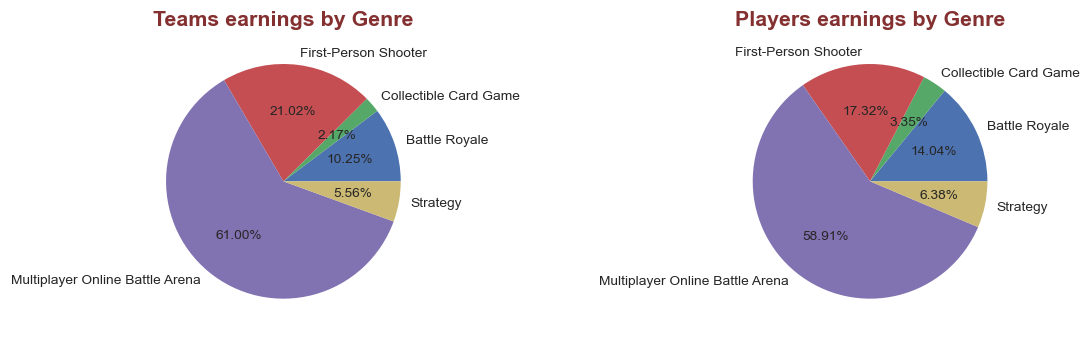

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=110)
fig.subplots_adjust(left=0.2,
                    bottom=0,
                    right=1,
                    top=1,
                    wspace=1)


axs[0].pie(teams_genre, autopct='%.2f%%', labels=teams_genre.index, textprops={'size':9})
axs[0].set_title('Teams earnings by Genre', color='#843030', fontsize=14, fontweight='bold')


axs[1].pie(players_genre, autopct='%.2f%%', labels=teams_genre.index, textprops={'size':9})
axs[1].set_title('Players earnings by Genre', color='#843030', fontsize=14, fontweight='bold')

plt.show()

In [62]:
print('\n ➥ Here... we have {0}MOBA{1} with a considerable percentage in the case of both {0}Teams{1} and {0}Players{1}!'.format(format_bold,
                                                                                                                                 format_end))


 ➥ Here... we have MOBA with a considerable percentage in the case of both Teams and Players!


# 

### ⭒ Which game is most popular in terms of number of tournaments?

In [63]:
teams.head()

TeamId             TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760  San Francisco Shock   3,105,000.00                 7  Overwatch   
1     776      London Spitfire   1,591,136.50                13  Overwatch   
2     768   New York Excelsior   1,572,618.50                18  Overwatch   
3     773  Philadelphia Fusion   1,186,278.50                15  Overwatch   
4     766        Seoul Dynasty   1,130,000.00                 6  Overwatch   

                  Genre  
0  First-Person Shooter  
1  First-Person Shooter  
2  First-Person Shooter  
3  First-Person Shooter  
4  First-Person Shooter

In [64]:
most_popular_game = teams.groupby('Game')['TotalTournaments'].sum().sort_values(ascending=False)

In [65]:
most_popular_game.head(1)

Game
Starcraft II    12676
Name: TotalTournaments, dtype: int64

In [66]:
most_popular_game = most_popular_game.sort_values()

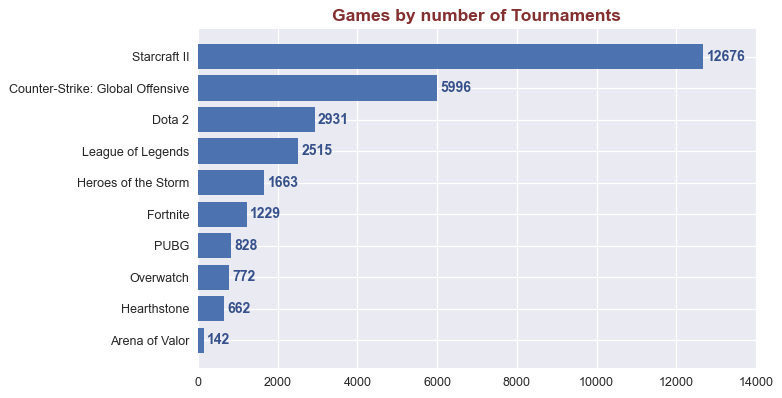

In [67]:
fig, ax = plt.subplots(figsize=(8,5), dpi=90)


plt.barh(most_popular_game.index, most_popular_game)

plt.title('Games by number of Tournaments', color='#843030', fontsize=14, fontweight='bold')

x_axis = np.arange(0, 14001, 2000)
plt.xticks(x_axis)

for idx, val in enumerate(most_popular_game):
    ax.text(val+80, idx, str(val), va='center', color='#36518B', fontweight='bold', fontsize=11.2)



plt.show()

In [68]:
best_game = most_popular_game.idxmax()
number_of_tournaments = most_popular_game[most_popular_game.idxmax()]

print('\n ➥ The best game by the number of tournaments is {0}{2}{1} with {0}{3:,}{1} tournaments.'.format(format_bold,
                                                                                                                    format_end,
                                                                                                                    best_game,
                                                                                                                    number_of_tournaments))


 ➥ The best game by the number of tournaments is Starcraft II with 12,676 tournaments.


# 

### ⭒ Best 3 Teams Earnings by Game

In [69]:
teams.head()

TeamId             TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760  San Francisco Shock   3,105,000.00                 7  Overwatch   
1     776      London Spitfire   1,591,136.50                13  Overwatch   
2     768   New York Excelsior   1,572,618.50                18  Overwatch   
3     773  Philadelphia Fusion   1,186,278.50                15  Overwatch   
4     766        Seoul Dynasty   1,130,000.00                 6  Overwatch   

                  Genre  
0  First-Person Shooter  
1  First-Person Shooter  
2  First-Person Shooter  
3  First-Person Shooter  
4  First-Person Shooter

In [70]:
bestTeamsByGame = teams.loc[:, ['Game','TeamName','TotalUSDPrize']].sort_values(['Game','TotalUSDPrize'], ascending=[True,False]).groupby('Game').head(3)

In [71]:
bestTeamsByGame.head(6)

Game         TeamName  TotalUSDPrize
880                    Arena of Valor     eStar Gaming   2,613,323.67
881                    Arena of Valor        Hero JiuJ   1,104,361.96
882                    Arena of Valor  Qiao Gu Reapers     951,865.26
400  Counter-Strike: Global Offensive         Astralis   8,503,918.81
401  Counter-Strike: Global Offensive      Team Liquid   4,675,925.35
402  Counter-Strike: Global Offensive           Fnatic   4,653,396.20

In [72]:
bestTeamsByGame = bestTeamsByGame.sort_values(['Game','TotalUSDPrize'], ascending=[False, True])

In [73]:
bestTeamsByGame

Game             TeamName  TotalUSDPrize
102                      Starcraft II        SK Telecom T1   1,143,991.90
101                      Starcraft II          Team Liquid   1,498,925.04
100                      Starcraft II  Jin Air Green Wings   2,546,572.70
602                              PUBG          Team Liquid     934,382.58
601                              PUBG            FaZe Clan   1,349,801.00
600                              PUBG                Gen.G   2,805,813.88
2                           Overwatch   New York Excelsior   1,572,618.50
1                           Overwatch      London Spitfire   1,591,136.50
0                           Overwatch  San Francisco Shock   3,105,000.00
202                 League of Legends      Invictus Gaming   4,176,617.93
201                 League of Legends              Samsung   4,252,048.74
200                 League of Legends        SK Telecom T1   7,139,771.24
702               Heroes of the Storm               Cloud9     447,242.63
701               Heroes of the Storm            Nordavind     483,601.94
700               Heroes of the Storm           G2 Esports     575,312.54
802                       Hearthstone               Fnatic     931,148.76
801                       Hearthstone        Team Dignitas   1,178,555.54
800                       Hearthstone                  MVP   1,656,839.93
302                          Fortnite            Sentinels   3,166,116.68
301                          Fortnite        Cooler Esport   3,299,864.26
300                          Fortnite              Lazarus   3,708,150.00
502                            Dota 2        Evil Geniuses  19,988,670.62
501                            Dota 2          Team Liquid  22,967,431.10
500                            Dota 2                   OG  33,810,636.13
402  Counter-Strike: Global Offensive               Fnatic   4,653,396.20
401  Counter-Strike: Global Offensive          Team Liquid   4,675,925.35
400  Counter-Strike: Global Offensive             Astralis   8,503,918.81
882                    Arena of Valor      Qiao Gu Reapers     951,865.26
881                    Arena of Valor            Hero JiuJ   1,104,361.96
880                    Arena of Valor         eStar Gaming   2,613,323.67

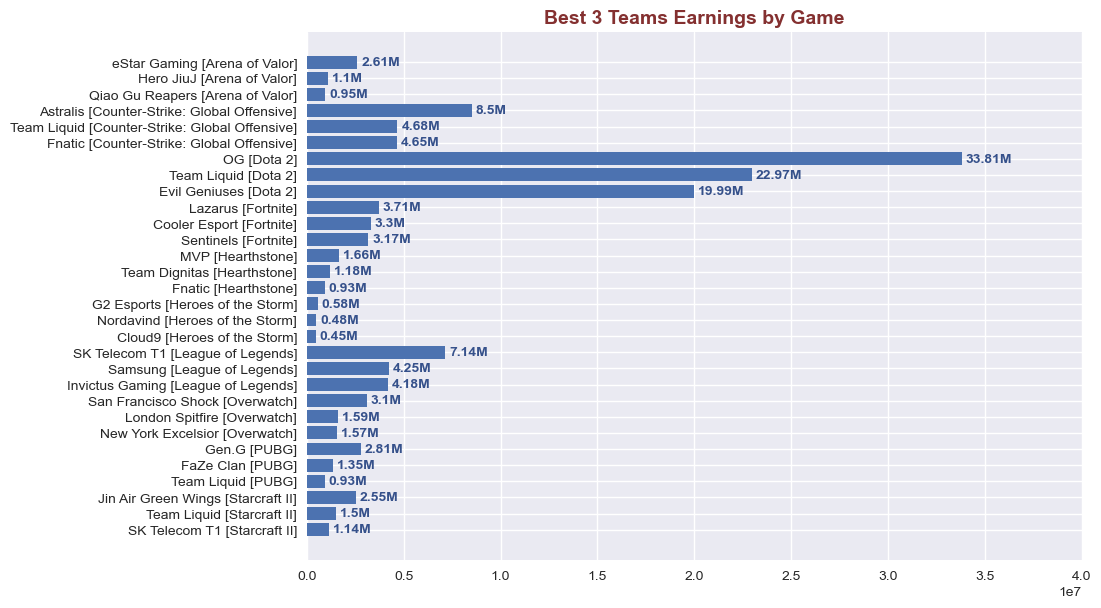

In [74]:
fig, ax = plt.subplots(figsize=(10,7), dpi=100)

plt.barh(bestTeamsByGame['TeamName'] + ' [' + bestTeamsByGame['Game'] + ']', bestTeamsByGame['TotalUSDPrize'])

for idx, val in enumerate(bestTeamsByGame['TotalUSDPrize']):
    str_value = str(round(val / 1000 ** 2, 2)) + 'M'
    ax.text(val + 2 * 10**5, idx, str_value, va='center', color='#36518B', fontweight='bold')
        

plt.title('Best 3 Teams Earnings by Game', color='#843030', fontsize=14, fontweight='bold')
x = 10 ** 7    # 10,000,000
plt.xticks([0, 0.5*x, 1*x, 1.5*x, 2*x, 2.5*x, 3*x, 3.5*x, 4*x])


plt.show()

# 

### ⭒ Top 5 Players Earnings by Continents

In [75]:
players_location

PlayerId  NameFirst   NameLast CurrentHandle  TotalUSDPrize  \
0        61896     Thiago       Lapp          kinG   1,021,000.00   
1        30167  Francisco  Leimontas           PNC      82,409.24   
2        15703       Facu     Pruzzo     Nalguidan      70,750.00   
3        30451    Anathan       Pham           ana   6,000,411.96   
4        15530     Damien       Chok          kpii   1,809,225.30   
...        ...        ...        ...           ...            ...   
1027     12793    Jeffrey        Liu         Tarei      62,454.40   
1028     29438    Anthony    Trevino           Ant      52,375.00   
1029      3255       Drew  Biessener   Tidesoftime      50,449.60   
1030     43043       Mike    Eichner           Ike      48,550.00   
1031     49029     Sanjar     Kuliev         SANJI     232,167.42   

                                  Game                            Genre  \
0                             Fortnite                    Battle Royale   
1                          Hearthstone            Collectible Card Game   
2                          Hearthstone            Collectible Card Game   
3                               Dota 2  Multiplayer Online Battle Arena   
4                               Dota 2  Multiplayer Online Battle Arena   
...                                ...                              ...   
1027                       Hearthstone            Collectible Card Game   
1028                       Hearthstone            Collectible Card Game   
1029                       Hearthstone            Collectible Card Game   
1030                       Hearthstone            Collectible Card Game   
1031  Counter-Strike: Global Offensive             First-Person Shooter   

     Continent_Name                   Country_Name  Country_Number  
0     South America  Argentina, Argentine Republic           32.00  
1     South America  Argentina, Argentine Republic           32.00  
2     South America  Argentina, Argentine Republic           32.00  
3           Oceania     Australia, Commonwealth of           36.00  
4           Oceania     Australia, Commonwealth of           36.00  
...             ...                            ...             ...  
1027  North America       United States of America          840.00  
1028  North America       United States of America          840.00  
1029  North America       United States of America          840.00  
1030  North America       United States of America          840.00  
1031           Asia        Uzbekistan, Republic of          860.00  

[1032 rows x 10 columns]

In [76]:
filtered = players_location.loc[:, ['CurrentHandle', 'Continent_Name','TotalUSDPrize']]
hightest_player_by_continent = filtered.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[True, False]).groupby('Continent_Name').head(5)

In [77]:
hightest_player_by_continent = hightest_player_by_continent.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[False, True]).set_index('Continent_Name')

In [78]:
hightest_player_by_continent

CurrentHandle  TotalUSDPrize
Continent_Name                             
South America           kinG   1,021,000.00
South America       coldzera   1,021,901.46
South America         FalleN   1,059,938.92
South America            fer   1,063,038.92
South America           TACO   1,063,858.27
Oceania                Custa      53,759.68
Oceania              Arcaner      57,228.00
Oceania               Luke12      79,049.82
Oceania                 kpii   1,809,225.30
Oceania                  ana   6,000,411.96
North America        Arteezy   2,257,053.21
North America           Fear   2,551,657.34
North America            ppd   2,995,619.62
North America       UNiVeRsE   3,057,237.67
North America          Bugha   3,141,395.05
Europe                KuroKy   5,193,382.81
Europe                Topson   5,470,902.57
Europe                   Ceb   5,554,297.41
Europe                 JerAx   6,470,000.02
Europe                N0tail   6,952,596.58
Asia                      fy   2,894,690.34
Asia                Somnus丶M   2,984,982.14
Asia                  SumaiL   3,608,317.34
Asia                      GH   4,193,412.69
Asia                Miracle-   4,798,043.68

In [79]:
asia = hightest_player_by_continent[hightest_player_by_continent.index == 'Asia']
europe = hightest_player_by_continent[hightest_player_by_continent.index == 'Europe']
north_america = hightest_player_by_continent[hightest_player_by_continent.index == 'North America']
oceania = hightest_player_by_continent[hightest_player_by_continent.index == 'Oceania']
south_america = hightest_player_by_continent[hightest_player_by_continent.index == 'South America']

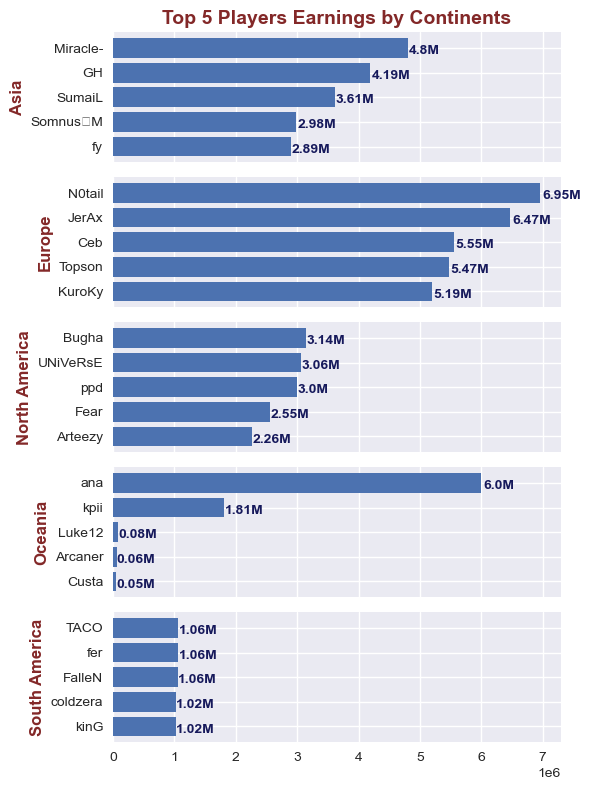

In [81]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(6,8), dpi=100, sharex=True)


axs[0].barh(asia['CurrentHandle'], asia['TotalUSDPrize'])
axs[1].barh(europe['CurrentHandle'], europe['TotalUSDPrize'])
axs[2].barh(north_america['CurrentHandle'], north_america['TotalUSDPrize'])
axs[3].barh(oceania['CurrentHandle'], oceania['TotalUSDPrize'])
axs[4].barh(south_america['CurrentHandle'], south_america['TotalUSDPrize'])


axs[0].set_title('Top 5 Players Earnings by Continents',  color='#832828', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Asia', color='#832828', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Europe', color='#832828', fontsize=12, fontweight='bold')
axs[2].set_ylabel('North America', color='#832828', fontsize=12, fontweight='bold')
axs[3].set_ylabel('Oceania', color='#832828', fontsize=12, fontweight='bold')
axs[4].set_ylabel('South America', color='#832828', fontsize=12, fontweight='bold')


def show_text(name_continent, idx_axes):
    for idx, val in enumerate(name_continent['TotalUSDPrize']):
        axs[idx_axes].text(val * 1.005, idx - 0.25, str(round(val / 10 ** 6, 2)) + 'M', fontweight='bold', color='#171A5C')

for index, name in enumerate([asia, europe, north_america, oceania, south_america]):
    show_text(name, index)




plt.tight_layout()
plt.show()